In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop("target", axis=1)
y = df["target"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
!pip install --upgrade scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [7]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.9473684210526315
Precision: 0.9577464788732394
Recall   : 0.9577464788732394
F1 Score : 0.9577464788732394

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



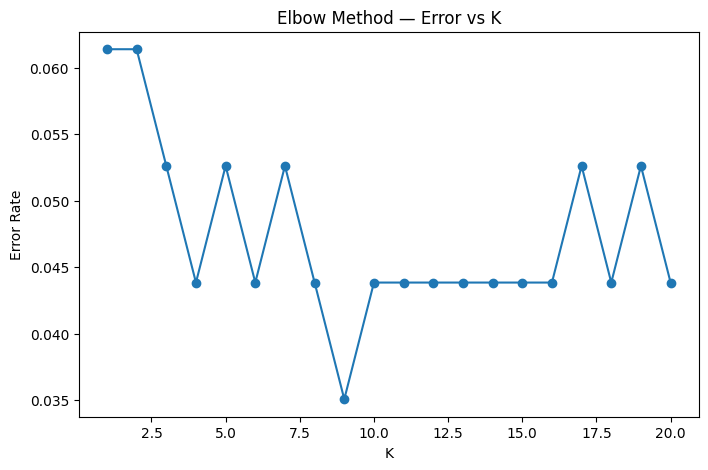

In [8]:
# Elbow Method for Best K Value
errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, errors, marker='o')
plt.title("Elbow Method — Error vs K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [9]:
# Compare Distance Metrics (Euclidean, Manhattan)
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)

    print(f"\nMetric: {metric}")
    print("Accuracy:", accuracy_score(y_test, pred))


Metric: euclidean
Accuracy: 0.9473684210526315

Metric: manhattan
Accuracy: 0.9649122807017544

Metric: minkowski
Accuracy: 0.9473684210526315


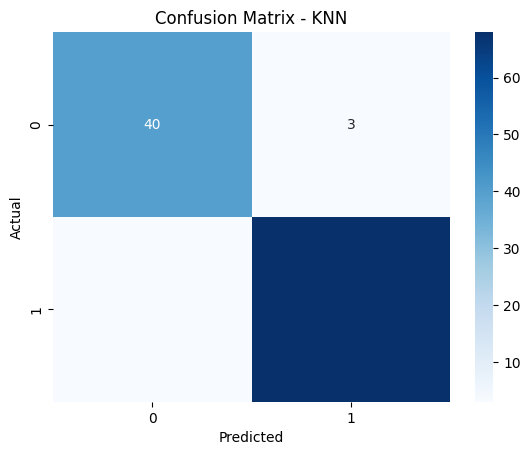

In [10]:
# CONFUSION MATRIX PLOT
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()